In [1]:
# Load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/scale_wlg_nobackup/filesets/nobackup/massey03212/Python'

In [2]:
pwd

'/scale_wlg_nobackup/filesets/nobackup/massey03212/Python'

In [7]:
df = pd.read_csv("/scale_wlg_nobackup/filesets/nobackup/massey03212/Python_04_23/beta_diversity_3.csv")

In [8]:
import pandas as pd
import numpy as np

# Load the distance matrix from a CSV file
df = pd.read_csv("/scale_wlg_nobackup/filesets/nobackup/massey03212/Python_04_23/beta_diversity_3.csv", index_col=0)

# Replace "x.xxx" with NaN values
df = df.replace("x.xxx", np.nan)

# Convert the data frame to a numpy array
mat = df.values.astype(float)

# Create a symmetric matrix
mat = np.triu(mat) + np.triu(mat, 1).T

# Set diagonal values to NaN
np.fill_diagonal(mat, np.nan)

# Convert back to a data frame
df = pd.DataFrame(mat, index=df.index, columns=df.columns)

# View the resulting data frame
print(df)



         0      1      2      3      4      5      6      7      8      9  \
x                                                                           
0      NaN  0.594  0.152  0.417  0.195  0.237  0.313  0.372  0.497  0.702   
1    0.594    NaN  0.600  0.581  0.622  0.597  0.510  0.507  0.461  0.493   
2    0.152  0.600    NaN  0.465  0.152  0.246  0.349  0.388  0.513  0.702   
3    0.417  0.581  0.465    NaN  0.450  0.452  0.361  0.507  0.498  0.744   
4    0.195  0.622  0.152  0.450    NaN  0.279  0.362  0.416  0.527  0.717   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
252  0.880  0.807  0.881  0.892  0.873  0.874  0.865  0.815  0.856  0.822   
253  0.744  0.763  0.720  0.844  0.712  0.747  0.781  0.731  0.802  0.710   
254  0.796  0.790  0.781  0.864  0.766  0.797  0.826  0.780  0.841  0.813   
255  0.866  0.694  0.863  0.879  0.859  0.850  0.836  0.769  0.768  0.631   
256  0.870  0.845  0.861  0.912  0.853  0.876  0.881  0.834  0.888  0.857   

In [10]:
# Save the resulting data frame to a CSV file
df.to_csv("/scale_wlg_nobackup/filesets/nobackup/massey03212/Python_04_23/beta_diversity_3_clean.csv")


ANOVA: F = 108.64892051287923 , p = 2.1125221335151986e-79
Tukey's HSD:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
            Cattle               Goat  -0.1696 0.5111 -0.4496  0.1104  False
            Cattle Habituated_gorilla  -1.2549   -0.0 -1.5141 -0.9958   True
            Cattle    Human_community  -1.4407   -0.0 -1.7016 -1.1797   True
            Cattle     Human_hospital  -1.6513   -0.0 -1.9117  -1.391   True
            Cattle       Wild_gorilla  -1.1452   -0.0 -1.4055 -0.8849   True
              Goat Habituated_gorilla  -1.0853   -0.0  -1.354 -0.8167   True
              Goat    Human_community  -1.2711   -0.0 -1.5415 -1.0007   True
              Goat     Human_hospital  -1.4817   -0.0 -1.7515 -1.2119   True
              Goat       Wild_gorilla  -0.9756   -0.0 -1.2454 -0.7058   True
Hab

ValueError: too many values to unpack (expected 2)

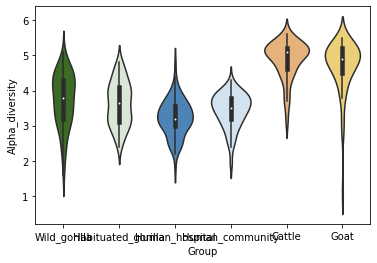

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read in the data
df = pd.read_csv("/scale_wlg_nobackup/filesets/nobackup/massey03212/Python/alpha_diversity_Uganda.csv")

# Define the order of the groups
group_order = ["Wild_gorilla", "Habituated_gorilla", "Human_hospital", "Human_community", "Cattle", "Goat"]

# Reorder the levels of the Group variable
df["Group"] = pd.Categorical(df["Group"], categories=group_order)

# Define colours for the violinplot and points
my_colors = ["#38761d", "#d9ead3", "#3d85c6", "#cfe2f3", "#f6b26b", "#ffd966"]

# Perform one-way ANOVA
f, p = f_oneway(df["Alpha_diversity"][df["Group"] == "Wild_gorilla"],
                df["Alpha_diversity"][df["Group"] == "Habituated_gorilla"],
                df["Alpha_diversity"][df["Group"] == "Human_hospital"],
                df["Alpha_diversity"][df["Group"] == "Human_community"],
                df["Alpha_diversity"][df["Group"] == "Cattle"],
                df["Alpha_diversity"][df["Group"] == "Goat"])

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(df["Alpha_diversity"], df["Group"])

# Print ANOVA and Tukey's HSD results
print("ANOVA: F =", f, ", p =", p)
print("Tukey's HSD:\n", tukey)

# Create violinplot using seaborn
sns.violinplot(x="Group", y="Alpha_diversity", data=df, palette=my_colors)

# Add asterisks for significance
y_max = df["Alpha_diversity"].max()
y_min = df["Alpha_diversity"].min()
y_diff = y_max - y_min
for i, (a, b) in enumerate(tukey._results_table[1:]):
    if a not in group_order or b not in group_order:
        continue
    if tukey.reject[i]:
        x_pos = group_order.index(a)
        y_pos = y_max + (i + 1) * y_diff / 20
        plt.plot([x_pos - 0.2, x_pos + 0.2], [y_pos, y_pos], color="black", lw=1)
        plt.text(x_pos, y_pos, "***", ha="center", va="center", color="black", fontsize=14)

# Set axis labels and title
plt.xlabel("Group")
plt.ylabel("Shannon's diversity")
plt.title("Alpha diversity across groups")

# Show plot
plt.show()
